In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# puvodni podoba datasetu
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
# preprocessing datasetu, priprava pro aplikaci linerani regrese
df = pd.get_dummies(data=df, columns=['lunch', 'gender', 'race/ethnicity', 'parental level of education', 'test preparation course'])
df.head()

,math score,reading score,writing score,lunch_free/reduced,lunch_standard,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,72,72,74,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,69,90,88,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,47,57,44,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
4,76,78,75,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


In [4]:
from sklearn.model_selection import train_test_split
# rozdeleni datasetu na trainingove a testovaci data (75/25)
X = df.drop('writing score', axis=1)
y = df[['writing score']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [5]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
# vypocet koeficientu
recoef = regression_model.coef_.flatten().tolist()
dfcolumns = X.columns.tolist()

for var, varnum in zip(dfcolumns, recoef):
    print(var + "\t" + str(varnum))   


math score	0.29815694019327993
reading score	0.6447551882441318
lunch_free/reduced	-0.20324702544176576
lunch_standard	0.2032470254417639
gender_female	2.9989926102503244
gender_male	-2.9989926102503244
race/ethnicity_group A	-0.21119840482379515
race/ethnicity_group B	-0.29425809878575243
race/ethnicity_group C	0.36851044046693193
race/ethnicity_group D	1.6435611475665202
race/ethnicity_group E	-1.506615084423906
parental level of education_associate's degree	0.046441980155930034
parental level of education_bachelor's degree	1.2418315811177636
parental level of education_high school	-1.2936362161760913
parental level of education_master's degree	1.364824066607028
parental level of education_some college	-0.05157883256741342
parental level of education_some high school	-1.3078825791372162
test preparation course_completed	1.792480464829863
test preparation course_none	-1.7924804648298625


In [127]:
# vypocet korelace mezi poctem ziskanych bodu z writing score, reading score a math score
correlation1 = df["writing score"].corr(df["reading score"])
correlation1 = df["writing score"].corr(df["math score"])

print("Korelace reading score / writing socre (max. 1) : " + str(correlation.round(3)))
print("Korelace math score / writing score (max. 1) : " + str(correlation1.round(3)))

Korelace reading score / writing socre (max. 1) : 0.955
Korelace math score / writing score (max. 1) : 0.803


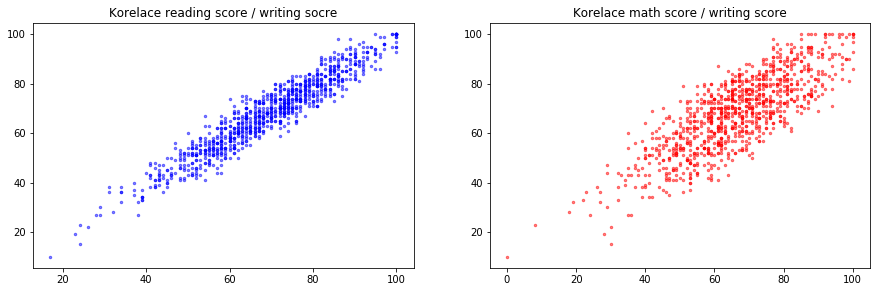

In [124]:
# graficke znazorneni korelace mezi poctem ziskanych bodu z writing score, reading score a math score
fig = plt.figure(figsize=(15,4.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_title("Korelace reading score / writing socre")
ax2.set_title("Korelace math score / writing score")
ax1.scatter(df['reading score'], df['writing score'], c="b", s=6, alpha=0.5)
ax2.scatter(df['math score'], df['writing score'], c="r", s=6, alpha=0.5)
plt.show()

In [6]:
# vyuziti R2 pro vypocet presnosti modelu
# 94.5 % variability Y muze byt vysvetleno vyuzitim X

from sklearn.metrics import r2_score

pred_score = regression_model.predict(X_test)

R2 = r2_score(y_test, pred_score)

R2 = R2 * 100

print("Presnost modelu cini : " + str(round(R2, 2)) + " %")

Presnost modelu cini : 94.51 %


In [7]:
#mean squared error using scikit-learn

from sklearn.metrics import mean_squared_error
import math

y_predict = regression_model.predict(X_test)
regression_model_mse = round(mean_squared_error(y_predict, y_test),2)

# v prumeru dela predikce od skutecnosti 3.5 bodu
odch = round(math.sqrt(regression_model_mse),2)
print("Odchylka predikovanych hodnot od skutecnyh prumer : " + str(odch) + " bodu")

Odchylka predikovanych hodnot od skutecnyh prumer : 3.53 bodu


In [141]:
#predikce na pro hodnoty ve tretim radku datasetu (skutecny writing score = 93)
pred_test = regression_model.predict([[90, 95, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]]).flatten()
pred_test = pred_test.round(1).tolist()
print("Predikovana hodnota writing score na zaklade algoritmu je: ")
print(pred_test[1])

Predikovana hodnota writing score na zaklade algoritmu je: 


IndexError: list index out of range

In [10]:
#vytvoreni dataframe ze realnych a predikovanych dat 
real_data = np.array(y_test)
real_data1 = real_data.tolist()
repr = [item for sublist in real_data1 for item in sublist]
real_data2 = pd.Series(repr)
prediction = regression_model.predict(X_test).round(1)
prediction1 = prediction.tolist()
pr = [item for sublist in prediction1 for item in sublist]
prediction2 = pd.Series(pr)
results = pd.concat([real_data2, prediction2], axis=1)
results.columns = ['real', 'prediction']

results.head(10)

,real,prediction
0,54,54.5
1,68,67.9
2,74,74.6
3,58,58.0
4,55,56.1
5,51,54.6
6,51,49.6
7,36,33.2
8,69,65.1
9,82,80.8


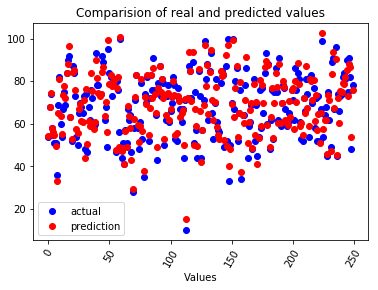

In [11]:
# vyplotovani skutecnych a predikovanych hodnot
plt.plot(results.index, results['real'], 'bo', label = 'actual')
plt.plot(results.index, results['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
plt.xlabel('Values'); plt.title('Comparision of real and predicted values');

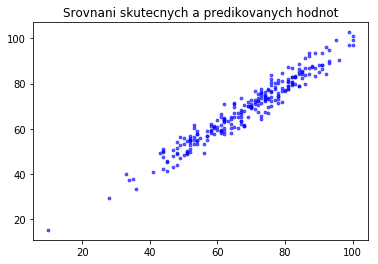

In [133]:
# srovnani skutecnych a predikovanych hodnot
plt.scatter(results['real'], results['prediction'], c="b", s=8, alpha=0.6)
plt.title("Srovnani skutecnych a predikovanych hodnot")
plt.show()

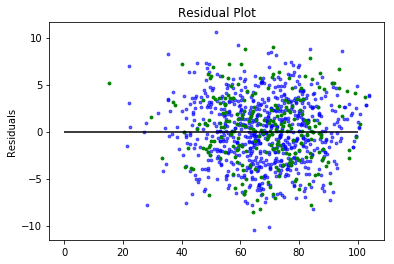

In [77]:
# kontrola vypoctu, hodnoty rovnomerne rozmistene kolem 0
plt.scatter(regression_model.predict(X_train), regression_model.predict(X_train) - y_train, c="b", s=8, alpha=0.6)
plt.scatter(regression_model.predict(X_test), regression_model.predict(X_test) - y_test, c="g", s=8)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.show()
